In [1]:
import os

os.chdir("..")

In [2]:
import torch
from diffusers.pipelines import FluxPipeline
from PIL import Image

from omini.pipeline.flux_omini import Condition, generate, seed_everything, convert_to_condition

In [3]:
import os
# os.environ["HF_HUB_VERBOSITY"] = "info"
# os.environ["HF_HUB_DISABLE_PROGRESS_BARS"] = "0"
# from transformers.utils import logging
# logging.set_verbosity_info()
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [4]:
pipe.unload_lora_weights()

for condition_type in ["canny", "depth", "coloring", "deblurring"]:
    pipe.load_lora_weights(
        "Yuanshi/OminiControl",
        weight_name=f"experimental/{condition_type}.safetensors",
        adapter_name=condition_type,
    )

pipe.set_adapters(["canny", "depth", "coloring", "deblurring"])

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
/home/xinrui/miniconda3/envs/omini/lib/python3.10/site-packages/peft/tuners/tuners_utils.py:190: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associate

In [5]:
image = Image.open("assets/Picture1.png").convert("RGB")

w, h, min_dim = image.size + (min(image.size),)
image = image.crop(
    ((w - min_dim) // 2, (h - min_dim) // 2, (w + min_dim) // 2, (h + min_dim) // 2)
).resize((512, 512))

prompt = "a top view PCB image in red with components according to this layout"

In [ ]:
canny_image = convert_to_condition("canny", image)
condition = Condition(canny_image, "canny")

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

100%|██████████| 28/28 [00:13<00:00,  2.06it/s]


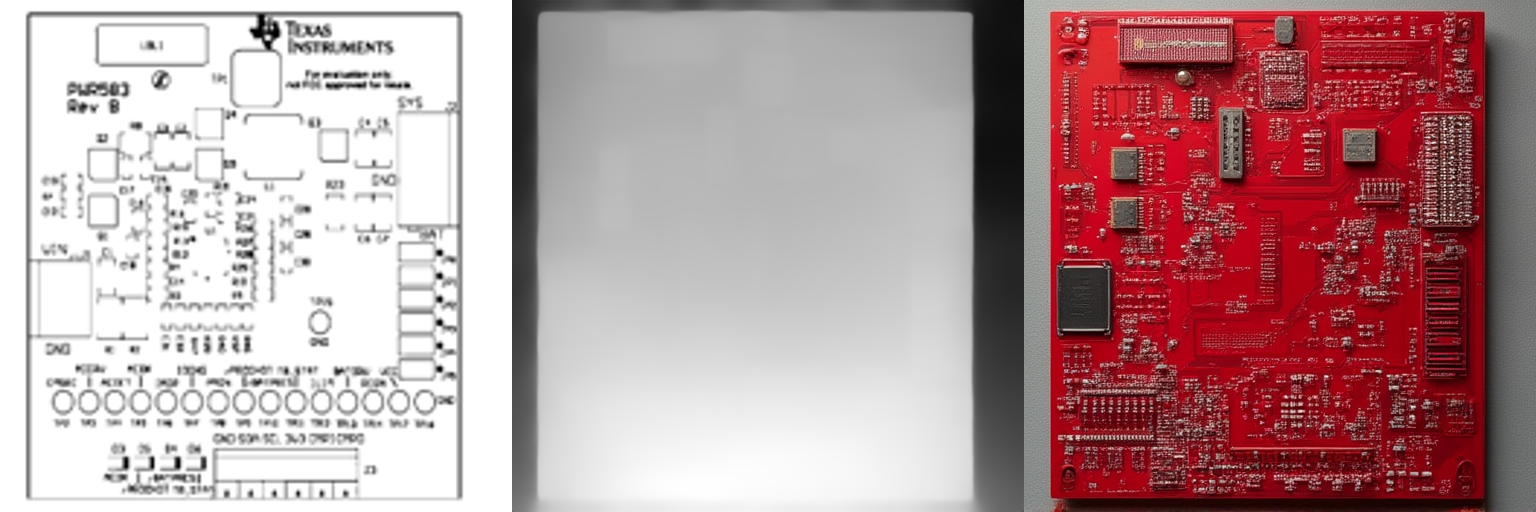

In [21]:
depth_image = convert_to_condition("depth", image)
condition = Condition(depth_image, "depth")

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

100%|██████████| 28/28 [00:13<00:00,  2.08it/s]


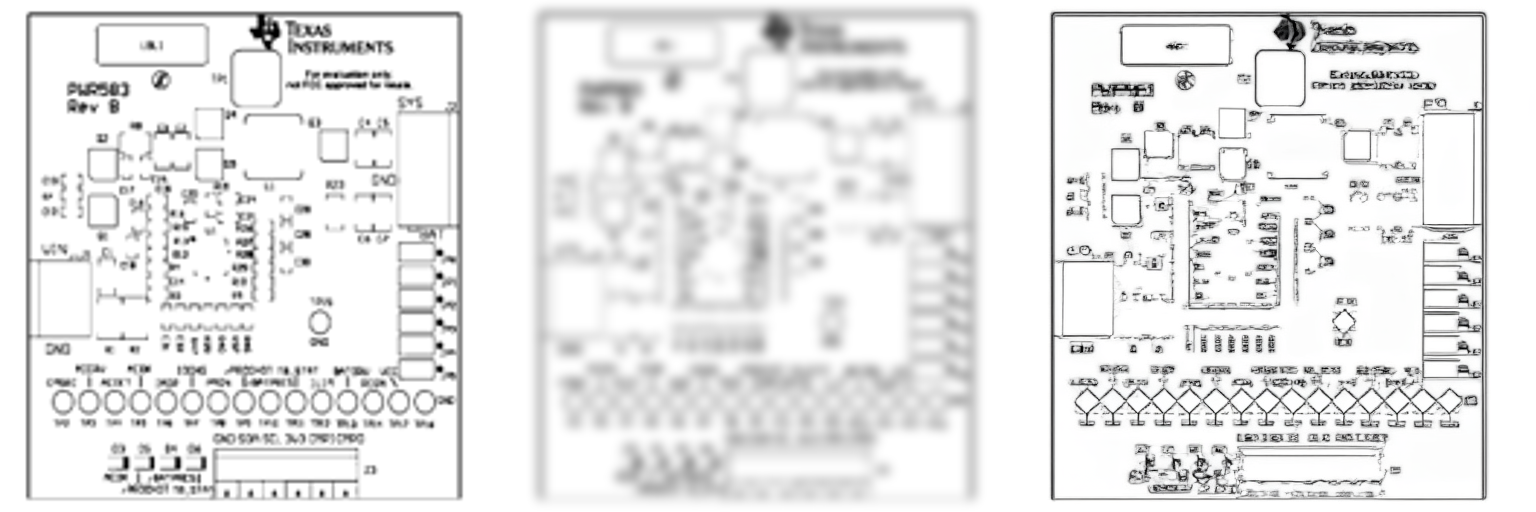

In [23]:
blur_image = convert_to_condition("deblurring", image)
condition = Condition(blur_image, "deblurring")

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

100%|██████████| 28/28 [00:13<00:00,  2.09it/s]


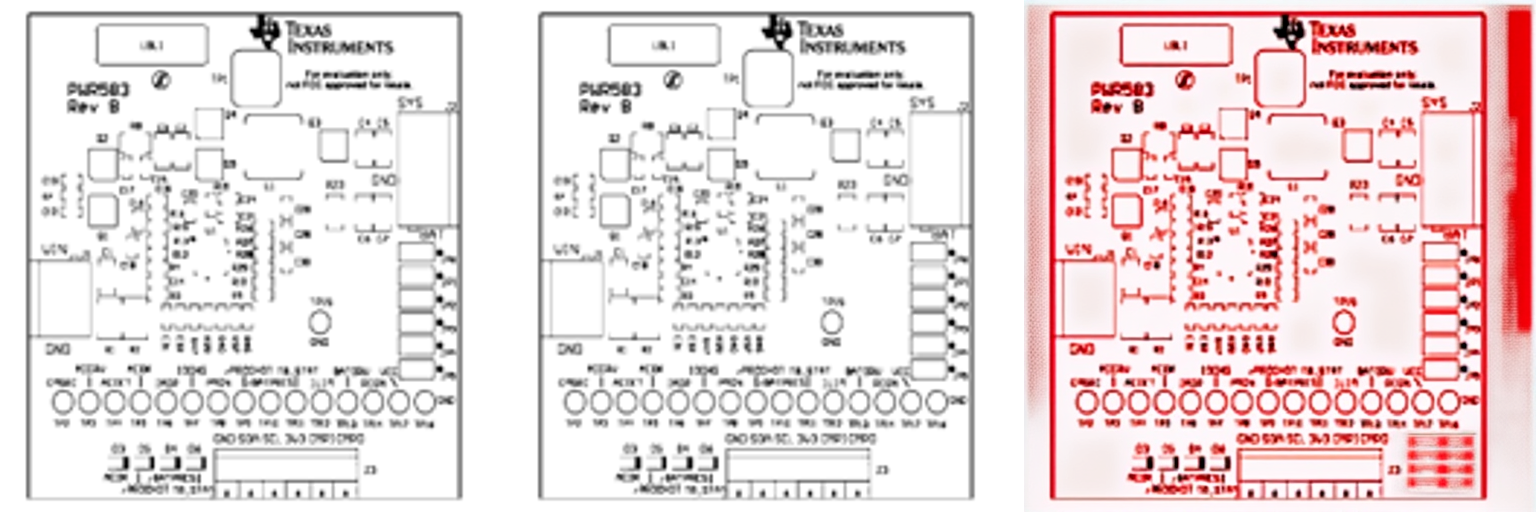

In [22]:
condition_image = convert_to_condition("coloring", image)
condition = Condition(condition_image, "coloring")

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image